## ML - Titanic


In [8]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')

### Cleanse data

In [9]:
#What data types are we looking at?
data.dtypes

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object

In [10]:
# Replace all "?" with NaN (Nulls)
data.replace('?', np.nan, inplace = True)

# Convert age and fare to float
data = data.astype({"age": np.float64, "fare": np.float64})

### Plot data

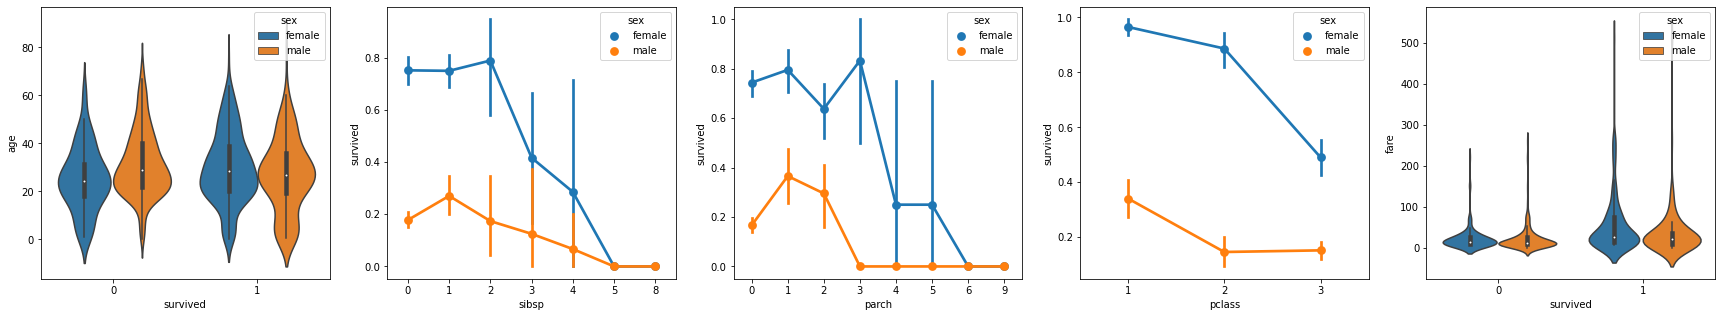

In [11]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [12]:
# Convert gender to bit - this will help with calculating correlations
data.replace({'male': 1, 'female': 0}, inplace=True)

In [13]:
# Analyse correlation of survived with other columns
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
